**Final Project Submission** 

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Bank Marketing Campaign

This project was completed as part of Flatiron School's Data Science Bootcamp (Module 3 Final Project).

## Introduction

### Problem Statement

### Business Value

### Methodology

We will adopt the OSEMN data science workflow, which involves:
1. Obtain (import the data)
2. Scrub (clean the data, deal with missing values and data types)
3. Explore (answer descriptives questions using EDA)
4. Model (build our predictive model)
5. iNterpret (comment on our model and findings)

### Libraries

In [201]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, \
precision_score, recall_score, roc_auc_score, classification_report

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Obtain Data

A dataset for this project has been provided and can be found in the `Data` folder in this repository.

It was originally from <a href = 'https://archive.ics.uci.edu/ml/datasets/Bank+Marketing'> UCI Machine Learning Repository</a>. 

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Load Data

In [21]:
# Read data 
raw_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

# Check first five rows
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
# Get info
raw_df.shape

(41188, 21)

We see that we have 21 columns, with 20 feature columns and 1 target column `y`. There are 41,188 entries recorded.

### Data Dictionnary

We have been provided with the following information regarding the **features**.

`age` - (numeric)

`job` - type of job (categorical: "admin.","blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")

`marital` - marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)

`education` - (categorical: "basic.4y", "basic.6y", "basic.9y",  "high.school", "illiterate", "professional.course", "university.degree", "unknown")

`default` - has credit in default? (categorical: "no", "yes", "unknown")

`housing`- has housing loan? (categorical: "no", "yes", "unknown")

`loan`- has personal loan? (categorical: "no", "yes", "unknown")

`contact` - contact communication type (categorical: "cellular", "telephone")

`month` - last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

`day_of_week` - last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")

`duration` - last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

`campaign` - number of contacts performed during this campaign and for this client (numeric, includes last contact)

`pdays` - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

`previous` - number of contacts performed before this campaign and for this client (numeric)

`poutcome` - outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

`emp.var.rate` - Employment variation is the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. - quarterly indicator (numeric)

`cons.price.idx` - The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. - monthly indicator (numeric)

`cons.conf.idx` - Consumer confidence index (CCI) This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. - monthly indicator (numeric)

`euribor3m` - The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. - daily indicator (numeric)

`nr.employed` - number of employees - quarterly indicator (numeric)

The **target** variable `y` is whether the client subscribed to a term deposit (binary: "yes", "no")

### Train-Test Split

Before we proceed, let us split our data into test and training sets. This test set will be use to evaluate our final model and we would like it to be completely new to us to avoid any data snooping bias.

We will ensure that the target variable `y` classes are proportional in the test set to ensure as based on our domain expertise we suspect that the classes will be unbalanced, with "yes" being a minority class.

In [23]:
# Train-test Split
train_set, test_set = train_test_split(raw_df, test_size = 0.1, stratify=raw_df['y'], random_state = 0)

print(f'Train set Shape: {train_set.shape}')
print(f'Test set Shape: {test_set.shape}')

Train set Shape: (37069, 21)
Test set Shape: (4119, 21)


## Scrub Data

Let us clean our DataFrame to ensure it is fit for exploration and modelling. We will work on a copy of the training set.

In [24]:
# Create copy to work with
df = train_set.copy()

### Check Data Types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 27720 to 37999
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory

All data types appear correct.

### Missing / Placeholder Values

In [26]:
# Check for missing values
df.isna().any().any()

False

This tells us there are no explicit `NaN` missing values. However there could still be placeholder values, say if a particular number was used to denote no data for numerical attributes or a string such as 'not known' for categorical attributes.

Let's first check the numerical attributes using the describe method.

In [27]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.010440,258.504627,2.572959,962.382962,0.173460,0.082918,93.576450,-40.505287,3.621223,5167.032108
std,10.409739,259.806298,2.779804,187.134790,0.496145,1.570596,0.578924,4.619696,1.734979,72.326507
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on the table, there do not appear to be any placeholder values in the numerical features with the exception of 999 in the `pdays` attribute,  used to to denote customers who were not previously contacted.

Let us look at `pdays` in further detail, to see how we should treat this attribute.

In [28]:
# Get value counts for pdays
df['pdays'].value_counts(normalize = True).sort_values(ascending = False)[:5]

999    0.963123
3      0.010845
6      0.009900
4      0.002698
9      0.001565
Name: pdays, dtype: float64

With 96% of entries in the `pdays` attribute being the placeholder value `999`, and the existence of attribute `previous` which contain the information whether a customer was previously contacted and how many times, it makes sense to drop this feature.

In [29]:
# Drop pdays feature
df = df.drop('pdays', axis = 1)

Let us now look at categorical features by inspecting value counts.

In [30]:
# Get categorical column list
cat_cols = df.select_dtypes(include = object).columns

# Print normalized value counts for categorical columns
for col in cat_cols:
    print(f"Feature: {col} \n{df[col].value_counts(normalize = True)} \n")

Feature: job 
admin.           0.252583
blue-collar      0.225040
technician       0.163452
services         0.095983
management       0.071138
retired          0.041841
entrepreneur     0.035555
self-employed    0.034233
housemaid        0.026167
unemployed       0.024630
student          0.021339
unknown          0.008039
Name: job, dtype: float64 

Feature: marital 
married     0.606383
single      0.280396
divorced    0.111387
unknown     0.001834
Name: marital, dtype: float64 

Feature: education 
university.degree      0.295665
high.school            0.230975
basic.9y               0.146726
professional.course    0.126683
basic.4y               0.101648
basic.6y               0.056112
unknown                0.041760
illiterate             0.000432
Name: education, dtype: float64 

Feature: default 
no         0.790796
unknown    0.209124
yes        0.000081
Name: default, dtype: float64 

Feature: housing 
yes        0.523942
no         0.451833
unknown    0.024225
Name: housing,

We see that there are `unknown` values in features `job`, `marital`, `education`, `default`, `housing` and `loan`, which we may want to address.

**job**

There is no dominating feature so our choices are to either keep `unknown` or drop the rows with missing data, which represent 0.8% of our dataset. We have selected to drop missing rows to keep the number of options manageable (as we will have to one hot encode categorical variables) and our results more interpretable.

**marital**

As the `unknown` values represent only 0.02% of our dataset, we have selected to drop them so as to not introduce potentially erraneaous data.

**education**

Similar to job, there is no dominating feature and so our choices are either to keep `unknown` or drop the rows with missing data, which represent 4% of our dataset. As this is a higher proportion, we will choose to keep `unknown` entries for now.

**default**

The `unknown` values represent 0.008% of the dataset and can be dropped to avoid introducing potentially erraneaous data.

**housing**

This binary column is split evenly as such our choices are either to keep `unknown` or drop the rows with missing data, which represent 2.4% of the dataset. We will choose to keep `unknown` entries for now.

**loan**

With 82% of the entries having value `no` and 2.4% of entries having value `unknown`, we think it best to replace the unknown values with no.

Let us apply these changes to our DataFrame.

In [31]:
# Cols in which to remove unknown
cols_unknown = ['job', 'default', 'marital']

# Replace unknwon with None and drop using dropna()
for col in cols_unknown:
    df[col] = df[col].replace('unknown', None)
    df[col] = df[col].dropna()
    
# Replace unknown values in loan with no
df['loan'] = df['loan'].replace('no')

### Clean Syntax

We see that certain column names have a dot in the name, which we will replace with underscore. Similarly, certain values in the `education` column have a dot which we will also replace with underscore. Finally, the we will remove the dot for entries with `admin.` value in the `job` column.

In [32]:
# Clean column names
df.columns = df.columns.str.replace('.', '_')

# Clean values in education
df['education'] = df['education'].str.replace('.', '_')

# Clean values in job
df['job'] = df['job'].str.replace('.','')

### Explore Duplicates

Let us check whether our data has any duplicate entries.

In [33]:
# Get duplicates
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
25217,39,admin,married,university_degree,no,no,yes,cellular,nov,tue,123,2,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
23415,44,technician,married,professional_course,no,no,yes,cellular,aug,wed,85,2,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
32516,35,admin,married,university_degree,no,yes,yes,cellular,may,fri,348,4,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
28476,24,services,single,high_school,no,yes,yes,cellular,apr,tue,114,1,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
18464,32,technician,single,professional_course,no,yes,yes,cellular,jul,thu,128,1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
236,56,blue-collar,married,basic_4y,no,no,yes,telephone,may,mon,136,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12261,36,retired,married,unknown,no,no,yes,telephone,jul,thu,88,1,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
20534,41,technician,married,professional_course,no,yes,yes,cellular,aug,tue,127,1,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
16956,47,technician,divorced,high_school,no,yes,yes,cellular,jul,thu,43,3,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


There appear to be 9 rows with exactly the same entries. However with the absence of a unique identifier (say a customer ID) it could very well be that these do indeed represent different customers.

Due to the small number of such entries, we will keep them as such. However it is worth informing our stakeholders that it would be preferable for the data to include a unique identifier.

## Explore and Visualise Data

### Target Variable

Let us begin by visualising the distribution of our target variable `y`, whether the customer subscribed to a term deposit.

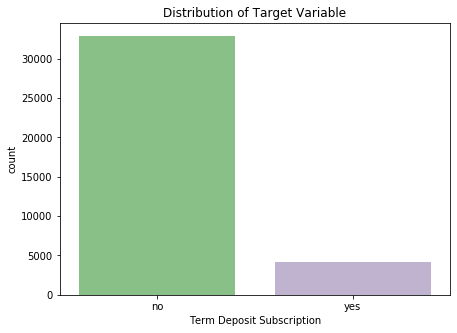

In [185]:
# Plot distribution of y
plt.figure(figsize = (7,5))
sns.countplot(df['y'], palette ='Accent')
plt.xlabel('Term Deposit Subscription')
plt.title('Distribution of Target Variable')
plt.show()

In [35]:
df['y'].value_counts(normalize = True)

no     0.887345
yes    0.112655
Name: y, dtype: float64

We immediately notice that we are dealing with imbalanced classes, with 88% of the entries representing data for a customer who did not subscribe to the term deposit. 

We will need to account for this imbalance or our model may be biased towards the majority class. We will also need to carefully select our evaluation metric to based on the business scenario. This is discussed in section X.

### Features

Let's investigate our features. We have a mix of numerical and categorical features to examine.

We begin by visualising numerical attributes via histograms.

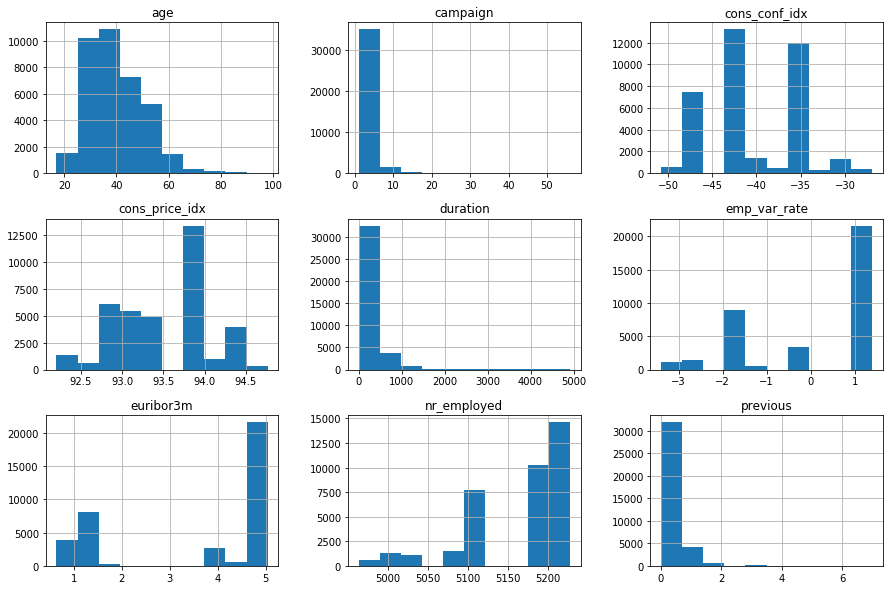

In [36]:
# Plot histograms
df.hist(figsize = (15,10))
plt.show()

Let us visualize **categorical** attributes using barplots. We will distinguish between `yes` or `no` values of our target variable to get an initial idea of which attributes might have the biggest impact on whether a customer will subscribe to a term deposit.

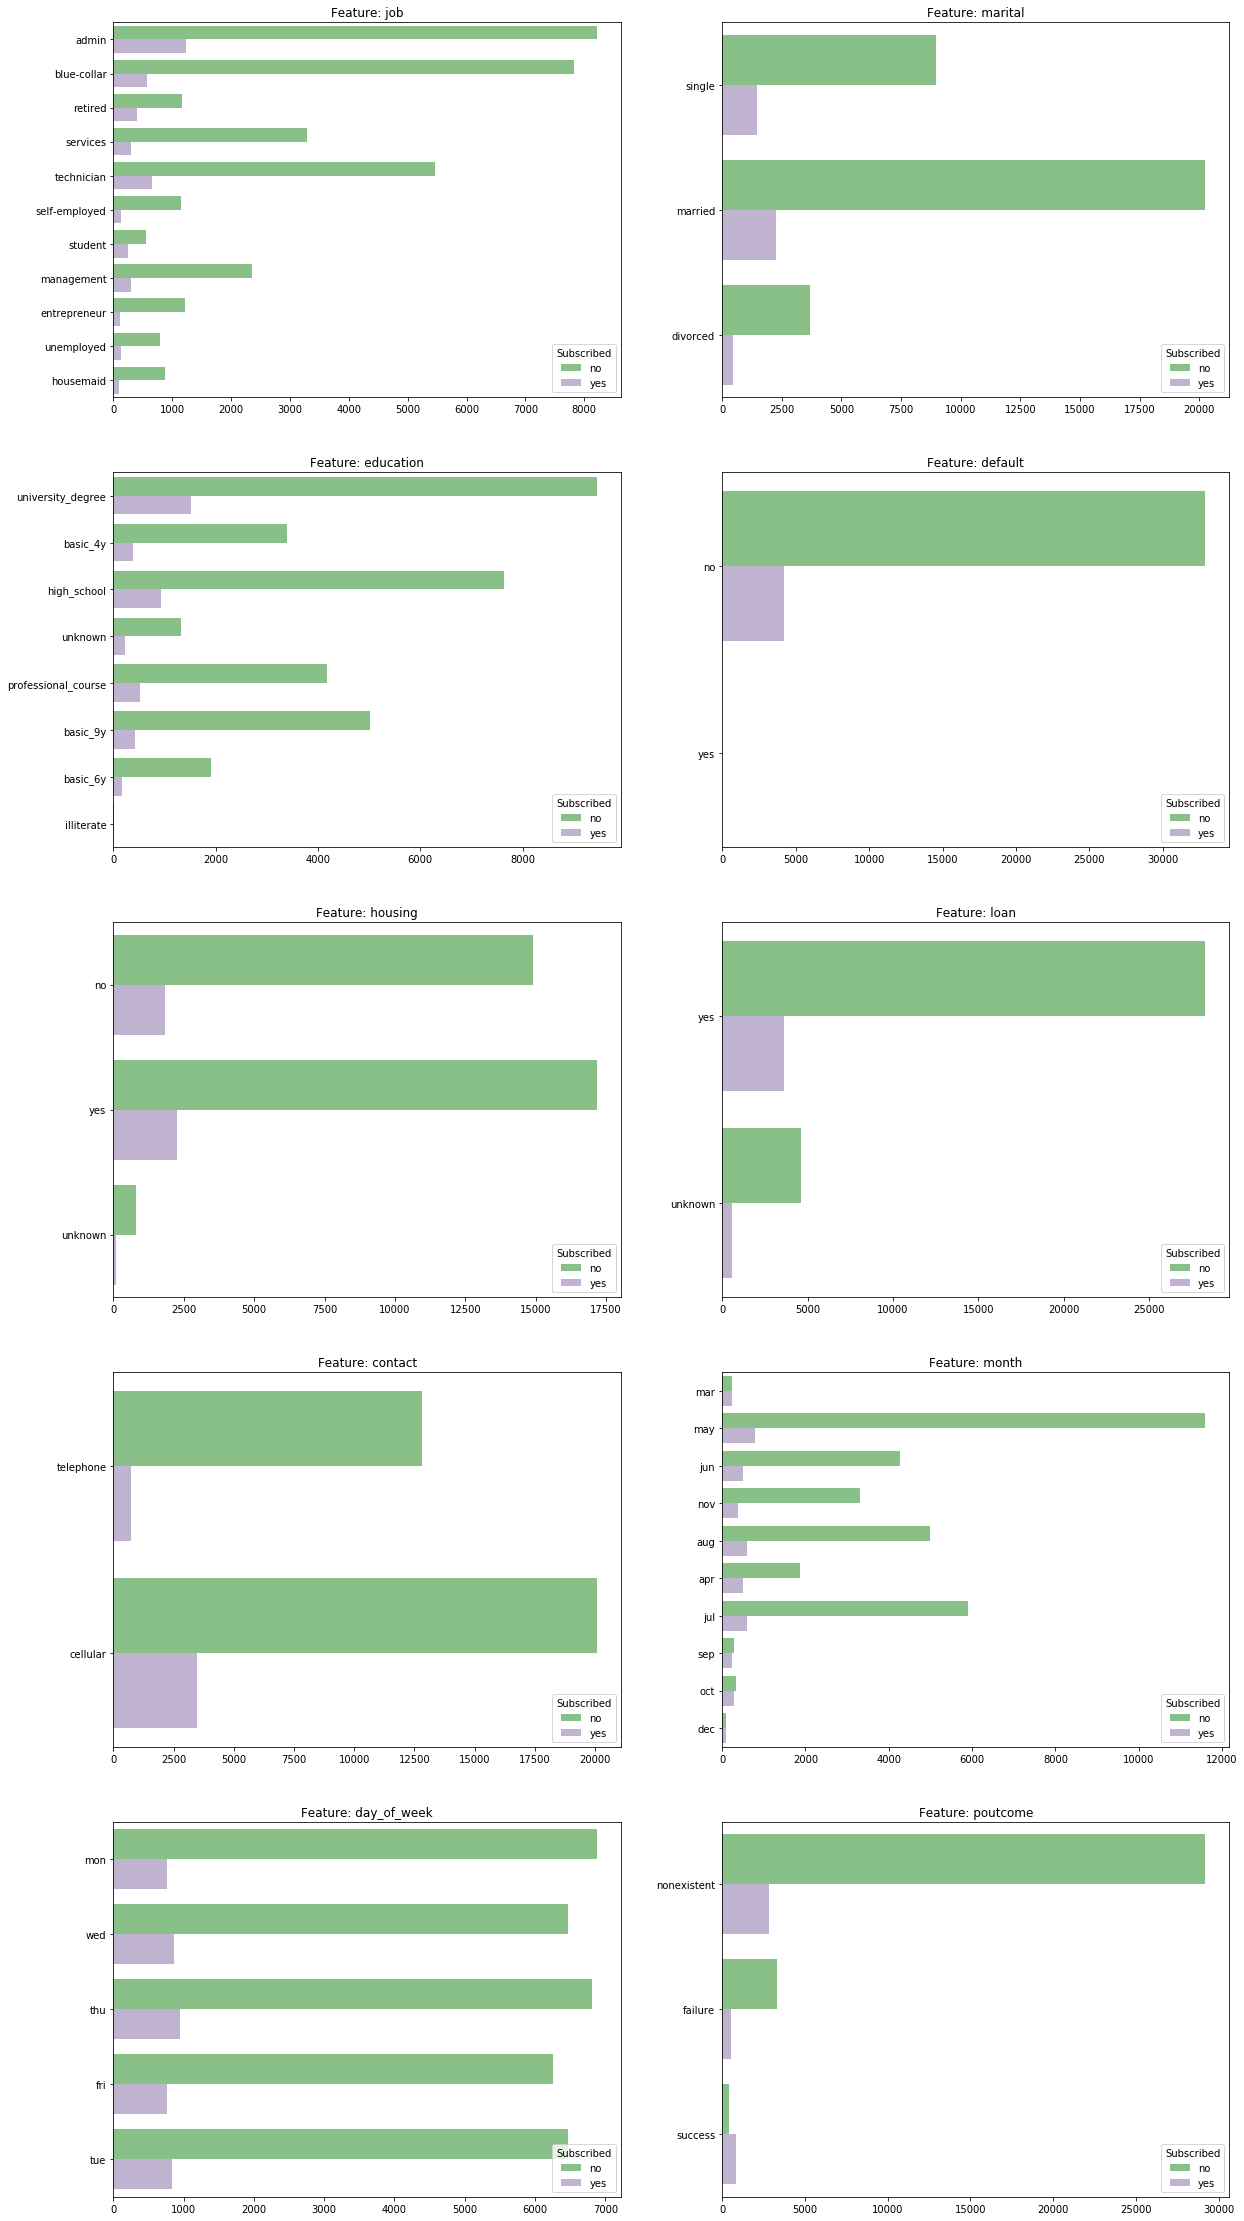

In [147]:
# Define cat feats as catcols less last item y
cat_feats = list(cat_cols)[:-1]

# Create barplot of categorical features with hue target variable

fig, axes = plt.subplots(5,2, figsize = (20,40))

for c, col in enumerate(cat_feats):
    ax_x = c // 2
    ax_y = c % 2
    sns.countplot(y = df[col], orient = 'h', hue = df['y'], palette = 'Accent', ax = axes[ax_x, ax_y])
    
    axes[ax_x, ax_y].set_title(f'Feature: {col}')
    axes[ax_x, ax_y].set_ylabel(None) 
    axes[ax_x, ax_y].set_xlabel(None) 
    axes[ax_x, ax_y].legend(title = "Subscribed", loc = 'lower right') 
plt.show()

Due to the class imbalance, it is difficult to see which attributes have the highest impact on the target variable. 

For instance, when looking at `job`, we just see fewer `yes` observations for every type of `job`. Let us try and improve on this, by looking at the `rate` of subscribers for each job category. Once we have a more useful visualization, we will extend to the other categorical variables.

In [98]:
# Establish counts of subscribers based on job using grouby
counts = df[['job', 'y']].groupby(['job','y']).size().unstack()
counts

y,no,yes
job,,
admin,8209,1228
blue-collar,7830,575
entrepreneur,1212,116
housemaid,880,94
management,2357,301
retired,1172,392
self-employed,1145,134
services,3292,295
student,547,255


In [77]:
# Count number of observations for each job category
job_counts = counts.sum(axis = 'columns')
job_counts

job
admin            9437
blue-collar      8405
entrepreneur     1328
housemaid         974
management       2658
retired          1564
self-employed    1279
services         3587
student           802
technician       6114
unemployed        921
dtype: int64

In [78]:
# Obtain proportions by dividing by the respective job counts
job_props = counts.div(job_counts, axis = 'index')
job_props

y,no,yes
job,,
admin,0.869874,0.130126
blue-collar,0.931588,0.068412
entrepreneur,0.912651,0.087349
housemaid,0.903491,0.096509
management,0.886757,0.113243
retired,0.749361,0.250639
self-employed,0.895231,0.104769
services,0.917759,0.082241
student,0.682045,0.317955


Now that the yes or no subscription rates for each education level add up to 1, we can see that customers who are `students` or `retired` are most likely to subscribe to a term deposit.

We can visualize this clearly with a stacked bar chart.

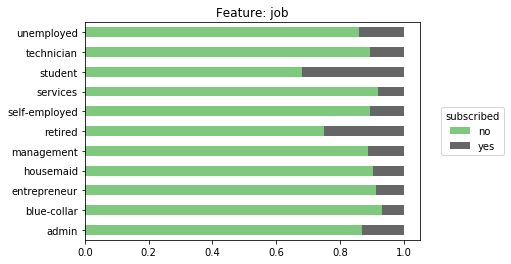

In [141]:
# Plot stacked bar chart
job_props.plot.barh(stacked = True, colormap = 'Accent')
# Have legend to the side
plt.legend(
    loc = 'center left',
    bbox_to_anchor = (1.05,0.5),
    title = 'subscribed')
plt.title('Feature: job')
plt.ylabel(None)
plt.show()

Let us define a function to create this plot, so that we can then easily apply it to the other features.

In [142]:
# Define function for stacked barplot

def feature_rate_plot(col, target, df, colormap = 'Accent', ax = None):
    
    counts = df[[col, target]].groupby([col,target]).size().unstack()
    col_counts = counts.sum(axis = 'columns')
    col_props = counts.div(col_counts, axis = 'index')
    
    # Plot stacked bar chart
    col_props.plot.barh(stacked = True, colormap = colormap, ax = ax )
    
    if ax == None:
        plt.title(f'Feature: {col}')
        plt.legend().remove()
        plt.ylabel(None)
        
    else:
        ax.set_title(f'Feature: {col}')
        ax.legend().remove()
        ax.set_ylabel(None)

Let us apply this function to create stacked barplots of all categorical features highlighting the rate of subscription.

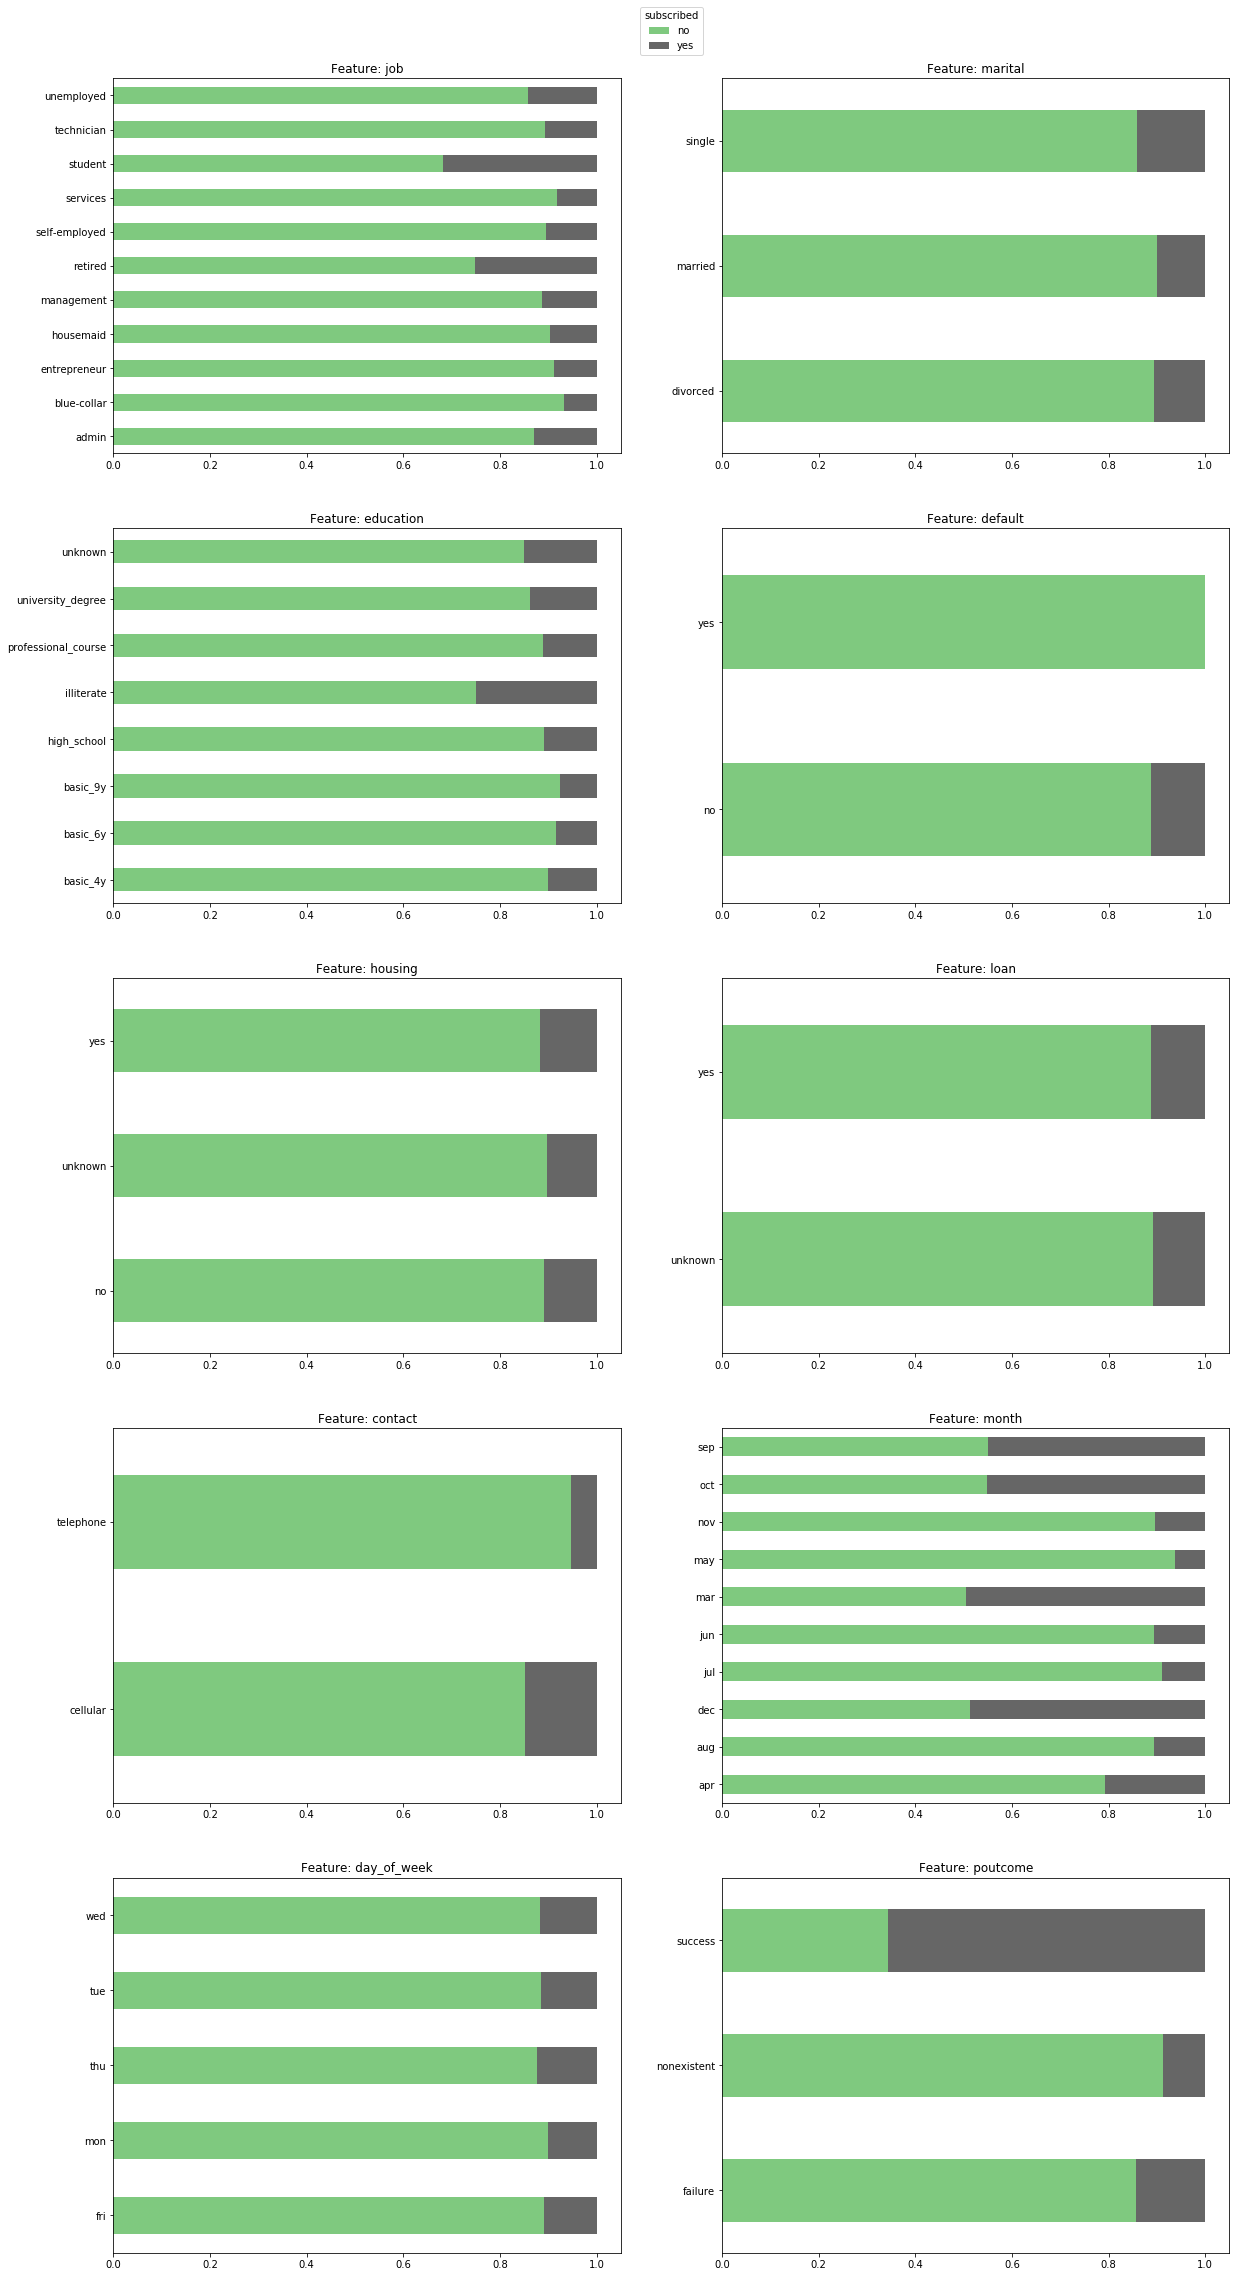

In [143]:
# Create barplot of categorical features with target variable rate

fig, axes = plt.subplots(5,2, figsize = (20,40))

for c, col in enumerate(cat_feats):
    ax_x = c // 2
    ax_y = c % 2
    feature_rate_plot(col, 'y', df, ax = axes[ax_x, ax_y] )
    
axes[0, 0].legend(
    loc='lower center', bbox_to_anchor=(1.1, 1.05), title='subscribed'
)
plt.show()

### When to launch the campaign?

### What can we learn from previous campaigns?

### How significant are economic features?

### Investigate Correlations

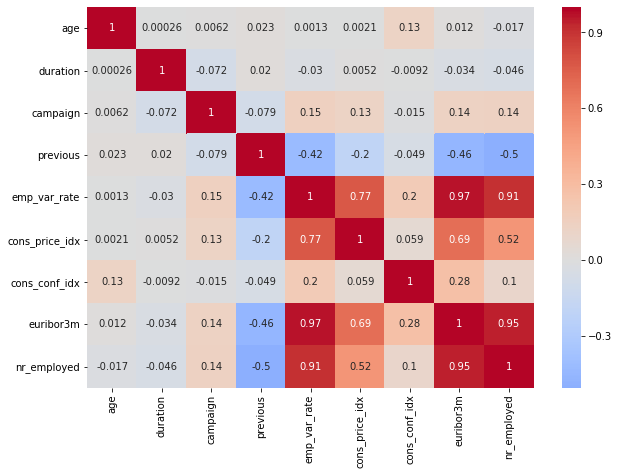

In [146]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (10,7))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.show()

## Additional Preprocessing

Let us split into features `X` and target `y`.

In [159]:
# Split into features X/ target y
X = df.drop('y', axis = 1)
y = df['y'].copy()

In [194]:
# Map y values to 1 and 0 
y = y.map(lambda x: 1 if x == 'yes' else 0)
y.value_counts()

0    32893
1     4176
Name: y, dtype: int64

### Categorical Variable Encoding

Let's use sklearn's `OneHotEncoder` to encode categorical variables.

In [175]:
# Get data of type object
X_cat = X.select_dtypes(include = object)

# Instantiate Class
ohe = OneHotEncoder()

# Fit and transform 
X_cat_1hot = ohe.fit_transform(X_cat)

# View results
X_cat_1hot

<37069x49 sparse matrix of type '<class 'numpy.float64'>'
	with 370690 stored elements in Compressed Sparse Row format>

`OneHotEncoder` creates a sparse matrix, which is useful for memory purposes when dealing with large datasets and significantly more columns. However we will transform back into a Numpy array and then DataFrame.

In [179]:
# Get column names
column_names = ohe.get_feature_names(X_cat.columns)

# Recreate dataframe
X_cat_encoded = pd.DataFrame(X_cat_1hot.toarray(), columns = column_names)

X_cat_encoded.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Scaling

Let's use sklearn's `StandardScaler` to normalize the data. Note that this is not required for all algorithms, but if we don't this would have a negative impact on classifiers which rely on 'distance' such as K-Nearest Neighbours.

In [167]:
# Get data of numerical type
X_num = X.select_dtypes(include = np.number)

# Instantiate Class
ss = StandardScaler()

# Fit and Transform Data
X_num_scaled = ss.fit_transform(X_num)

# Recreate DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_num.columns)
X_num_scaled.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,-0.865590,-0.844889,-0.206118,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255
1,-0.385264,-0.510020,-0.565860,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389
2,0.671453,0.509984,-0.565860,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255
3,0.671453,-0.752512,-0.206118,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348
4,0.671453,0.009605,-0.565860,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255


Let us combine `X_num_scaled` with `X_cat_encoded` to have a full DataFrame.

In [181]:
# Combine X_num_scaled and X_cat_encoded using pd.concat
X = pd.concat([X_num_scaled, X_cat_encoded], axis = 1)
X.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_admin,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.865590,-0.844889,-0.206118,-0.349621,-1.198872,-1.266936,-2.055296,-1.043383,-0.939255,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.385264,-0.510020,-0.565860,-0.349621,0.647586,0.721261,0.888661,0.712281,0.331389,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.671453,0.509984,-0.565860,1.665946,-1.198872,-1.180568,-1.232720,-1.357512,-0.939255,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.671453,-0.752512,-0.206118,-0.349621,0.838599,1.534850,-0.280263,0.775684,0.844348,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.671453,0.009605,-0.565860,-0.349621,-1.198872,-1.180568,-1.232720,-1.370192,-0.939255,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [183]:
# Check columms
X.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic_4y',
       'education_basic_6y', 'education_basic_9y', 'education_high_school',
       'education_illiterate', 'education_professional_course',
       'education_university_degree', 'education_unknown', 'default_no',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',


### Dealing with Class Imbalance

As we saw in the previous section, we are dealing with unbalanced target classes.

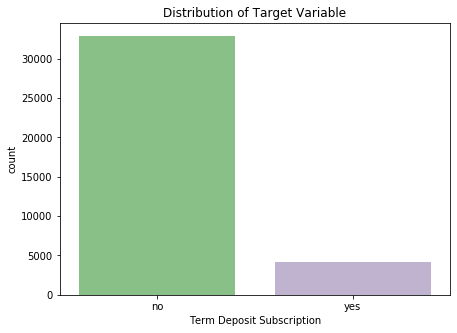

In [186]:
# Plot distribution of y
plt.figure(figsize = (7,5))
sns.countplot(df['y'], palette ='Accent')
plt.xlabel('Term Deposit Subscription')
plt.title('Distribution of Target Variable')
plt.show()

We will try two methods to adjust for this.

We will consider adjusting the weights to be inversely proportional to the frequency of the classes. With Sklearn, we can set the `class_weight` parameter to be `balanced`. This means that mistakes for the minority class will be more strongly penalized than mistakes for the majority class.

The other method we will consider is SMOTE (Synthetic Minority Oversampling Technique). This creates new synthetic data of the minority class.

We will apply a Random Forest classifier as a baseline model to investigate which of the above options looks to address the issue better.

In [196]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

In [199]:
# Define parameters for gridsearch
param_grid = {
    'n_estimators' : [100, 500],
    'criterion' : ['gini'],
    'max_depth' : [20,30],
    'min_samples_split' : [2,5]
            }

In [202]:
# Create classifier instance
clf = RandomForestClassifier(random_state = 0)

# Define GridSearch
gs_clf = GridSearchCV(clf, param_grid, scoring = 'f1', cv = 2)

# Fit GridsearchCV
gs_clf.fit(X_train,y_train)

# Get train f1
train_preds = gs_clf.predict(X_train)
train_f1 = f1_score(y_train, train_preds)

# Get test f1
test_preds = gs_clf.predict(X_test)
test_f1 = f1_score(y_test, test_preds)

# Get recall
train_recall = recall_score(y_train, train_preds)
test_recall = recall_score(y_test, test_preds)

print(f'Train F1 Score: {round(train_f1, 3)}')
print(f'Test F1 Score: {round(test_f1, 3)}')
print(f'Train Recall Score: {round(train_recall, 3)}')
print(f'Test Recall Score: {round(test_recall, 3)}')

print(classification_report(y_test, test_preds))

Train F1 Score: 0.977
Test F1 Score: 0.545
Train Recall Score: 0.955
Test Recall Score: 0.472
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6579
           1       0.65      0.47      0.55       835

    accuracy                           0.91      7414
   macro avg       0.79      0.72      0.75      7414
weighted avg       0.90      0.91      0.91      7414

